In [1]:
# Import libraries
import numpy as np
import pandas as pd

# Data points
data_points = [(1, 5), (1, 7), (2, 9), (2, 6), (3, 9), (3, 8), (3, 6), (3, 3),
               (4, 8), (4, 5), (5, 7), (5, 4), (6, 9), (7, 9), (7, 3), (7, 2),
               (8, 7), (8, 1)]

# DataFrame
df = pd.DataFrame(data_points, columns=['CoffeeType_Index', 'PopularTime_Index'])

# Display DataFrame
df.head()


,CoffeeType_Index,PopularTime_Index
0,1,5
1,1,7
2,2,9
3,2,6
4,3,9


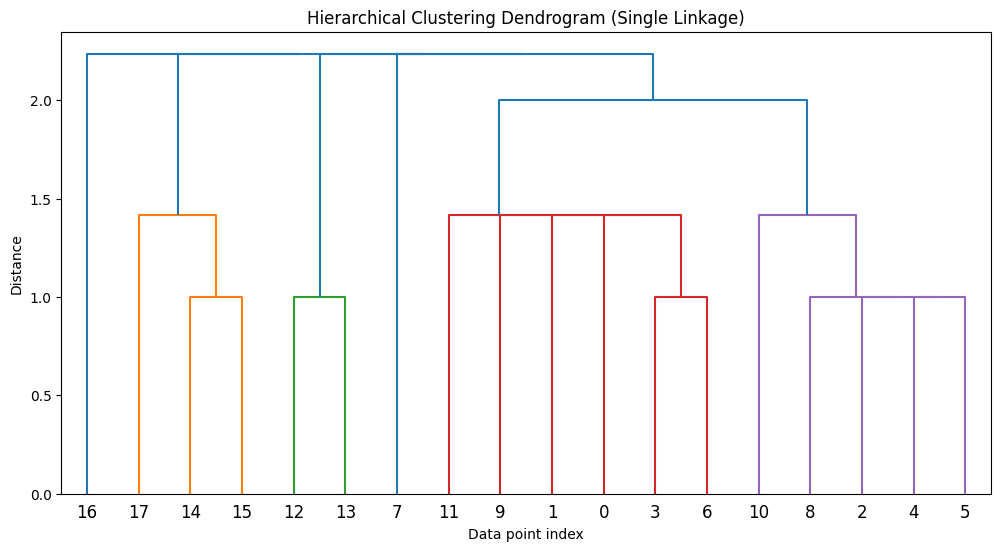

In [2]:
# Import libraries for clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Hierarchical clustering using Single Linkage
Z_single = linkage(df, method='single')

# Plotting the dendrogram for Single Linkage
plt.figure(figsize=(12, 6))
dendrogram(Z_single)
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Data point index')
plt.ylabel('Distance')
plt.show()


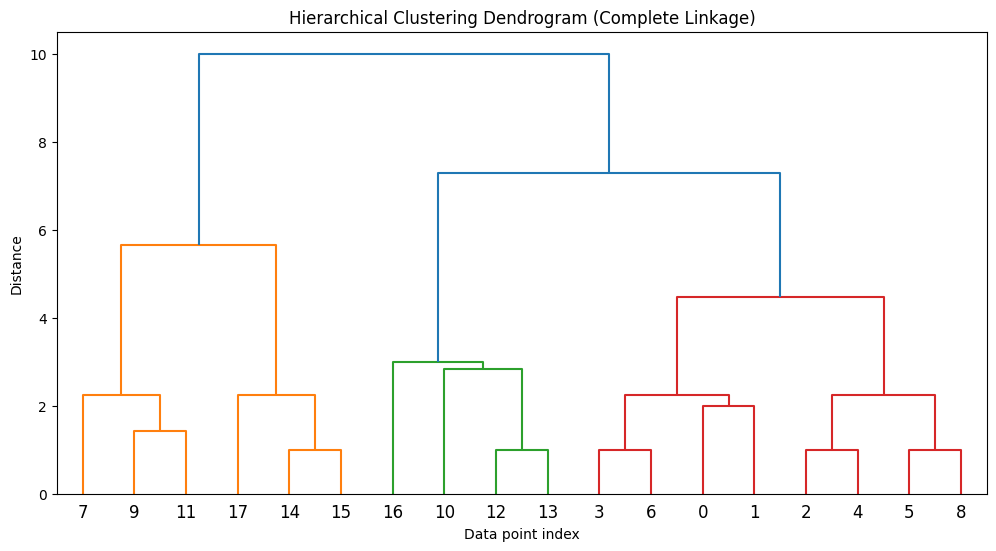

In [3]:
# Hierarchical clustering using Complete Linkage
Z_complete = linkage(df, method='complete')

# Plotting the dendrogram for Complete Linkage
plt.figure(figsize=(12, 6))
dendrogram(Z_complete)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Data point index')
plt.ylabel('Distance')
plt.show()


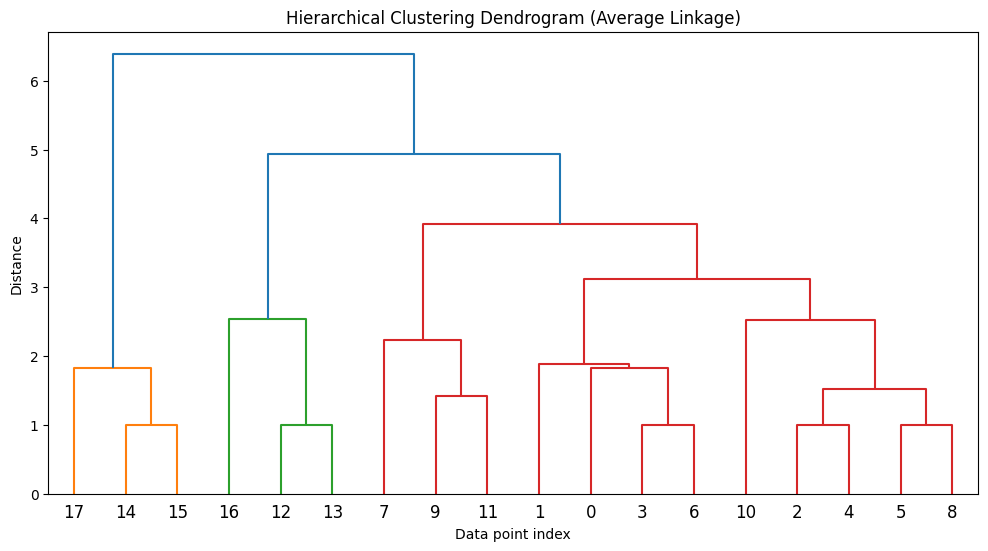

In [4]:
# Hierarchical clustering using Average Linkage
Z_average = linkage(df, method='average')

# Plotting the dendrogram for Average Linkage
plt.figure(figsize=(12, 6))
dendrogram(Z_average)
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Data point index')
plt.ylabel('Distance')
plt.show()


In [5]:
# Cutting the dendrogram to create clusters (max 3 clusters)
max_clusters = 3

# Creating clusters from the hierarchical clustering models
clusters_single = fcluster(Z_single, max_clusters, criterion='maxclust')
clusters_complete = fcluster(Z_complete, max_clusters, criterion='maxclust')
clusters_average = fcluster(Z_average, max_clusters, criterion='maxclust')

# Adding the cluster labels to the original DataFrame
df['Cluster_Single'] = clusters_single
df['Cluster_Complete'] = clusters_complete
df['Cluster_Average'] = clusters_average

# Display the data points along with their cluster labels
df.head()


,CoffeeType_Index,PopularTime_Index,Cluster_Single,Cluster_Complete,Cluster_Average
0,1,5,1,3,3
1,1,7,1,3,3
2,2,9,1,3,3
3,2,6,1,3,3
4,3,9,1,3,3


In [6]:
# Evaluating the most popular time slots in each cluster for each linkage method
popular_times_single = df.groupby('Cluster_Single')['PopularTime_Index'].value_counts().sort_index()
popular_times_complete = df.groupby('Cluster_Complete')['PopularTime_Index'].value_counts().sort_index()
popular_times_average = df.groupby('Cluster_Average')['PopularTime_Index'].value_counts().sort_index()

# Displaying the most popular time slots for each linkage method
popular_times_single, popular_times_complete, popular_times_average


(Cluster_Single  PopularTime_Index
 1               1                    1
                 2                    1
                 3                    2
                 4                    1
                 5                    2
                 6                    2
                 7                    3
                 8                    2
                 9                    4
 Name: PopularTime_Index, dtype: int64,
 Cluster_Complete  PopularTime_Index
 1                 1                    1
                   2                    1
                   3                    2
                   4                    1
                   5                    1
 2                 7                    2
                   9                    2
 3                 5                    1
                   6                    2
                   7                    1
                   8                    2
                   9                    2
 Name: PopularTime_Index

In [7]:
# Identifying the most common drinks during the popular time slots based on clustering results
popular_drinks_single = df[df['PopularTime_Index'].isin([9, 7, 6, 8])].groupby('Cluster_Single')['CoffeeType_Index'].value_counts().sort_index()
popular_drinks_complete = df[df['PopularTime_Index'].isin([9, 7, 6, 8])].groupby('Cluster_Complete')['CoffeeType_Index'].value_counts().sort_index()
popular_drinks_average = df[df['PopularTime_Index'].isin([9, 7, 6, 8])].groupby('Cluster_Average')['CoffeeType_Index'].value_counts().sort_index()

# Displaying the most common drinks for each linkage method during the popular time slots
popular_drinks_single, popular_drinks_complete, popular_drinks_average


(Cluster_Single  CoffeeType_Index
 1               1                   1
                 2                   2
                 3                   3
                 4                   1
                 5                   1
                 6                   1
                 7                   1
                 8                   1
 Name: CoffeeType_Index, dtype: int64,
 Cluster_Complete  CoffeeType_Index
 2                 5                   1
                   6                   1
                   7                   1
                   8                   1
 3                 1                   1
                   2                   2
                   3                   3
                   4                   1
 Name: CoffeeType_Index, dtype: int64,
 Cluster_Average  CoffeeType_Index
 2                6                   1
                  7                   1
                  8                   1
 3                1                   1
                 